In [29]:
import csv 

'''
В файле financial_data.csv сохранены данные оборота компании за первые три месяца 2019 года. К сожалению, данные были отсортированы неправильно, в результате чего даты находятся в случайном порядке.
Данные представлены в форме: {дд.мм.гггг; сумма.тыс.руб.}
1.	Отсортируйте полученный файл по датам и запишите результат в файл datesort_fin_data.csv. Данные должны быть представлены в той же форме.
2.	Отсортируйте полученный файл по обороту (по возрастанию) и запишите результат в файл sumsort_fin_data.csv. Данные должны быть представлены в той же форме.
3.	Найдите валовой оборот компании за три месяца, за каждый месяц. Постройте диаграмму с распределением оборота компании по месяцам с помощью mathplotlib.
4.	Из начального файла нужно извлечь строки, оборот в которых больше, чем 2000 тыс. руб. Полученные данные отсортируйте по дате и запишите в файл fin_data_final.csv.

ЗАДАНИЯ 1, 2
'''

class Data(object):
    def __init__(self, date, summa):
        self.date = date
        self.summa = int(summa)
        
        
def reader(path):
    with open(path, 'r', encoding='utf-8') as file:
        objects = []
        reader = csv.DictReader(file, delimiter=';')
        for object_line in reader:
            objects.append(Data(*object_line.values()))
        return objects
    
    
def sort_by_date(objects):
    objects.sort(key=lambda object_: object_.date, reverse=True)
    
    
def sort_by_summ(objects):
    objects.sort(key=lambda object_: object_.summa, reverse=True)
    
    
def data_creator(objects):
    data = []
    result_data = []
    data.append('Date;Summa'.split(';'))
    
    for index in range(len(objects)):
        data_string = objects[index].date + ';' + str(objects[index].summa)
        data.append(data_string.split(';'))
    fieldnames = data[0]
    
    for values in data[1:]:
        sub_dict = dict(zip(fieldnames, values))
        result_data.append(sub_dict)
    return fieldnames, result_data


def writer(path, fieldnames, data):
    with open(path, 'w', newline='', encoding='utf=8') as output:
        writer = csv.DictWriter(output, delimiter=';', fieldnames=fieldnames)
        writer.writeheader()
        for row in data:
            writer.writerow(row)
        

input_path = 'financial_data.csv'
output_path_ex1_1 = 'datesort_fin_data.csv'
output_path_ex1_2 = 'sumsort_fin_data.csv'
data_ex_1_1 = reader(input_path)
data_ex_1_2 = reader(input_path)
sort_by_date(data_ex_1_1)
sort_by_summ(data_ex_1_2)

fieldnames = data_creator(data_ex_1_1)[0]
output_data_ex_1_1 = data_creator(data_ex_1_1)[1]
output_data_ex_1_2 = data_creator(data_ex_1_2)[1]
writer(output_path_ex1_1, fieldnames, output_data_ex_1_1)
writer(output_path_ex1_2, fieldnames, output_data_ex_1_2)

([<matplotlib.axis.XTick at 0x1af74572730>,
 [Text(1, 0, '1 месяц'),
  Text(2, 0, '2 месяц'),
  Text(3, 0, '3 месяц'),
  Text(4, 0, 'Всего')])

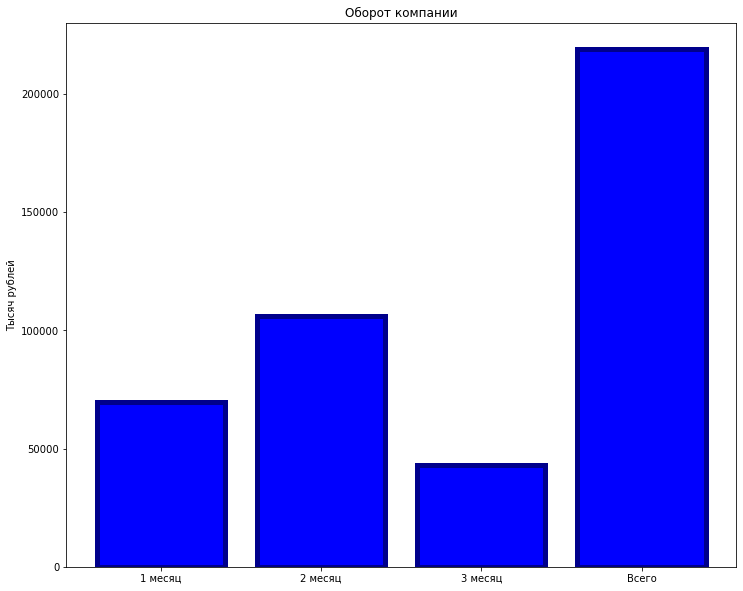

In [54]:
import csv
import matplotlib.pyplot as plt

'''
ЗАДАНИЯ 3, 4
'''

class Data(object):
    def __init__(self, date, summa):
        self.date = date
        self.summa = int(summa)
        
        
def reader(path):
    with open(path, 'r', encoding='utf-8') as file:
        objects = []
        reader = csv.DictReader(file, delimiter=';')
        for object_line in reader:
            objects.append(Data(*object_line.values()))
        return objects
     
    
def data_creator(objects):
    data = []
    result_data = []
    data.append('Date;Summa'.split(';'))
    
    for index in range(len(objects)):
        data_string = objects[index].date + ';' + str(objects[index].summa)
        data.append(data_string.split(';'))
    fieldnames = data[0]
    
    for values in data[1:]:
        sub_dict = dict(zip(fieldnames, values))
        result_data.append(sub_dict)
    return fieldnames, result_data

def gross_monthly_turnover(objects, month):
    if month == '1':
        month = '01'
    if month == '2':
        month = '02'
    if month == '3':
        month = '03'
        
    need_objects_list = []
    gross_monthly_turnover = 0
    
    for object_ in objects:
        if object_.date[3:5] == month:
            need_objects_list.append(object_)
    
    for object_ in need_objects_list:
        gross_monthly_turnover += object_.summa
    return gross_monthly_turnover


def sort_by_date(objects):
    objects.sort(key=lambda object_: object_.date, reverse=True)
    
    
def big_turnover(objects):
    sub_list = []
    for object_ in objects:
        if object_.summa > 2000:
            sub_list.append(object_)
    return sub_list

def writer(path, fieldnames, data):
    with open(path, 'w', newline='', encoding='utf=8') as output:
        writer = csv.DictWriter(output, delimiter=';', fieldnames=fieldnames)
        writer.writeheader()
        for row in data:
            writer.writerow(row)


path = 'financial_data.csv'
output_path = 'fin_data_final.csv'
data = reader(path)
sub_data = big_turnover(data)
sort_by_date(sub_data)
fieldnames = data_creator(sub_data)[0]
final_data = data_creator(sub_data)[1]
writer(output_path, fieldnames, final_data)


turnovers = [gross_monthly_turnover(data, '1'), gross_monthly_turnover(data, '2'), 
             gross_monthly_turnover(data, '3')]
turnovers.append(sum(turnovers))
months = [1, 2, 3, 4]
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))
ax1.bar(months, turnovers, color='blue', edgecolor='darkblue', linewidth=5)
ax1.set_title('Оборот компании')
plt.ylabel('Тысяч рублей')
plt.xticks(months, ['1 месяц', '2 месяц', '3 месяц', 'Всего'])